In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S9/')

Now we can import the library and use the function.

In [4]:
from __future__ import print_function
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#from models import QuizDNN as quiz
from transformations import CIFARModel10_Alb as cifar
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

import importlib
#importlib.reload(quiz)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Current Date/Time:  2020-04-01 07:50:21.418840
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


In [0]:
class QuizDNN(torch.nn.Module):
    def __init__(self, dropout_value = 0.1):
        """"Constructor of the class"""
        super(QuizDNN, self).__init__()
        # Input Block
        self.dropout_value = dropout_value
        #Depthwise separate 3 input channels into 3 output channels
        #it's first block uses following code:
        #x1 = Input
        #x2 = Conv(x1)
        #x3 = Conv(x1 + x2)
        #x4 = MaxPooling(x1 + x2 + x3)
        #x5 = Conv(x4)
        #x6 = Conv(x4 + x5)
        #x7 = Conv(x4 + x5 + x6)
        #x8 = MaxPooling(x5 + x6 + x7)
        #x9 = Conv(x8)
        #x10 = Conv (x8 + x9)
        #x11 = Conv (x8 + x9 + x10)
        #x12 = GAP(x11)
        #x13 = FC(x12)
        #Uses ReLU and BN wherever applicable
        #Uses CIFAR10 as the dataset
        #Your target is 75% in less than 40 Epochs
        #self.conv1 = nn.Conv2d(3, 6, 5)  # RF= 
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        #torch.nn.Conv2d(in_channels, out_channels=k*in_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        
        self.Conv0 = nn.Conv2d(3, 64, kernel_size=3, padding=1) #input 32*32*3, output=32*32*64
        
        self.Conv1 = nn.Conv2d(64, 64, kernel_size=3, padding=1) #input 32*32*64, output=32*32*64
        
        self.Conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1) #input 16*16*64, output=16*16*64
        
        self.Conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1) #input 8*8*64, output=8*8*64
        
        
        self.x2 = nn.Sequential( #input 32*32*64, output=32*32*64, RF=4
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        self.x3 = nn.Sequential(  #input 32*32*64, output=32*32*64, RF=6
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        
        self.x4 = nn.MaxPool2d(2, 2) #input 32*32*64, output=16*16*64, RF=7
        self.x5 = nn.Sequential( #input 16*16*64, output=16*16*64, RF=14
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        self.x6 = nn.Sequential( #input 16*16*64, output=16*16*64, RF=16
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        self.x7 = nn.Sequential( #input 16*16*64, output=16*16*64, RF=18
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        
        self.x8 = nn.MaxPool2d(2, 2) #input 16*16*64, output_size = (8*8*64), RF=19
        self.x9 = nn.Sequential( #input 8*8*64, output_size = (8*8*64), RF=38
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        self.x10 = nn.Sequential( #input 8*8*64, output_size = (8*8*64), RF=40
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        self.x11 = nn.Sequential( #input 8*8*64, output_size = (8*8*64), RF=42
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
            #nn.Dropout(dropout_value)
        )
        # OUTPUT BLOCK -> Add GAP Layer
        self.x12_gap = nn.Sequential( # input 8*8*64, output_size = (1*1*64), Receptive FieldF=42
            nn.AvgPool2d(kernel_size=8)
        )

        self.x13_fc = nn.Sequential(
            #nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
            nn.Linear(in_features=64, out_features=10)
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 

        self.dropout = nn.Dropout(self.dropout_value)

    def forward(self, x1):
        x2 = self.x2(x1)
        #print('x2=',len(x2))
        #x1_x2 = torch.cat((x1, x2), dim=1)
        x3 = self.x3(x2)
        #print('x3=',len(x3))
        #x1_x2_x3 = torch.cat((x2, x3),dim=2)
        x1_x2_x3 = x2.add(x3)
        x4 = self.x4(x1_x2_x3)
        #print('x4=',len(x4))
        x5 = self.x5(x4)
        #print('x5=',len(x5))
        #x4_x5 = torch.cat((x4, x5),dim=2)
        x4_x5 = x4.add(x5)
        x6 = self.x6(x4_x5)
        #print('x6=',len(x6))
        #x5_x6 = torch.cat((x5, x6),dim=2)
        x5_x6 = x5.add(x6)
        #x4_x5_x6 = torch.cat((x4, x5_x6),dim=2)
        x4_x5_x6 = x4.add(x5_x6)
        x7 = self.x7(x4_x5_x6)
        #print('x7=',len(x7))
        #x5_x6_x7 = torch.cat((x5_x6, x7),dim=2)
        x5_x6_x7 = x5_x6.add(x7)
        x8 = self.x8(x5_x6_x7)
        #print('x8=',len(x8))
        x9 = self.x9(x8)
        #print('x9=',len(x9))
        #x8_x9 = torch.cat((x8, x9),dim=2)
        x8_x9 = x8.add(x9)
        x10 = self.x10(x8_x9)
        #print('x10=',len(x10))
        #x8_x9_x10 = torch.cat((x8_x9, x10),dim=2)
        x8_x9_x10 = x8_x9.add(x10)
        x11 = self.x11(x8_x9_x10)
        #print('x11=',len(x11))
        x12 = self.x12_gap(x11)
        #print('x12=',len(x12))
        x12 = x12.view(-1, 64)
        x13 = self.x13_fc(x12)
        #print('x13=',len(x13))
        x13 = x13.view(-1, 10)
        #print('x13=',len(x13))
        #x14 = x13.view(-1, 10)
        return F.log_softmax(x13, dim=-1)
        

RUNNING WITH REGULARIZATION

In [6]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps

from models import QuizDNN as quiz
from transformations import CIFARModel10_Alb as cifar10_alb
from torchvision import datasets, transforms
import numpy as np
#images=datasets.CIFAR10(root='./data', train=True, download=True)

import importlib
importlib.reload(quiz)
importlib.reload(cifar10_alb)
#image_size=np.transpose(images.data[0], (2, 0, 1)).shape
#print('data size',image_size)
model = quiz.QuizDNN().to(device)
cifar_model = cifar10_alb.CIFARModel10_Alb(model)
show_summary(cifar_model,input_size=(3,32,32))


Current Date/Time:  2020-04-01 07:50:52.040358
Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,928
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 

RUN MODEL

In [7]:
  run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=10)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 0


Loss=6.574100017547607 Batch_id=195 Accuracy=24.14: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 3238/10000 (32.38%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 1


Loss=6.4868364334106445 Batch_id=195 Accuracy=31.69: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 3709/10000 (37.09%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 2


Loss=6.447192192077637 Batch_id=195 Accuracy=35.73: 100%|██████████| 196/196 [00:43<00:00,  4.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 4167/10000 (41.67%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 3


Loss=6.486907005310059 Batch_id=195 Accuracy=37.92: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 4289/10000 (42.89%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 4


Loss=6.065724849700928 Batch_id=195 Accuracy=40.34: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 4543/10000 (45.43%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 5


Loss=6.305738925933838 Batch_id=195 Accuracy=41.58: 100%|██████████| 196/196 [00:44<00:00,  4.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 4703/10000 (47.03%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 6


Loss=6.375967025756836 Batch_id=195 Accuracy=43.21: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 4941/10000 (49.41%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 7


Loss=6.417910575866699 Batch_id=195 Accuracy=44.43: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 5004/10000 (50.04%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 8


Loss=6.004683494567871 Batch_id=195 Accuracy=45.21: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 5087/10000 (50.87%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 9


Loss=6.008871078491211 Batch_id=195 Accuracy=46.15: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]


last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True

Test set: Average loss: 0.0054, Accuracy: 5113/10000 (51.13%)



In [8]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=40)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 0


Loss=6.2076311111450195 Batch_id=195 Accuracy=46.84: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5320/10000 (53.20%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 1


Loss=6.253283500671387 Batch_id=195 Accuracy=47.64: 100%|██████████| 196/196 [00:43<00:00,  4.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5308/10000 (53.08%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 2


Loss=6.08394718170166 Batch_id=195 Accuracy=48.41: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 5598/10000 (55.98%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 3


Loss=6.053168773651123 Batch_id=195 Accuracy=49.18: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 5484/10000 (54.84%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 4


Loss=6.175655364990234 Batch_id=195 Accuracy=49.80: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 5516/10000 (55.16%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 5


Loss=6.016340255737305 Batch_id=195 Accuracy=50.22: 100%|██████████| 196/196 [00:43<00:00,  4.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5851/10000 (58.51%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 6


Loss=6.266869068145752 Batch_id=195 Accuracy=51.16: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5879/10000 (58.79%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 7


Loss=6.0388922691345215 Batch_id=195 Accuracy=51.64: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5822/10000 (58.22%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 8


Loss=6.081737518310547 Batch_id=195 Accuracy=52.10: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5860/10000 (58.60%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 9


Loss=5.783382415771484 Batch_id=195 Accuracy=52.72: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5917/10000 (59.17%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 10


Loss=5.8631978034973145 Batch_id=195 Accuracy=52.98: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6007/10000 (60.07%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 11


Loss=5.915825843811035 Batch_id=195 Accuracy=53.81: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6138/10000 (61.38%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 12


Loss=5.828001499176025 Batch_id=195 Accuracy=54.01: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6100/10000 (61.00%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 13


Loss=5.9608869552612305 Batch_id=195 Accuracy=54.51: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6170/10000 (61.70%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 14


Loss=5.8852667808532715 Batch_id=195 Accuracy=54.95: 100%|██████████| 196/196 [00:43<00:00,  4.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6129/10000 (61.29%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 15


Loss=5.994065284729004 Batch_id=195 Accuracy=55.21: 100%|██████████| 196/196 [00:43<00:00,  4.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6259/10000 (62.59%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 16


Loss=6.040315628051758 Batch_id=195 Accuracy=55.99: 100%|██████████| 196/196 [00:43<00:00,  4.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6181/10000 (61.81%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 17


Loss=6.120204925537109 Batch_id=195 Accuracy=56.10: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6205/10000 (62.05%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 18


Loss=5.808000564575195 Batch_id=195 Accuracy=56.46: 100%|██████████| 196/196 [00:43<00:00,  4.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6431/10000 (64.31%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 19


Loss=5.688549518585205 Batch_id=195 Accuracy=56.85: 100%|██████████| 196/196 [00:43<00:00,  4.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6468/10000 (64.68%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 20


Loss=5.758640289306641 Batch_id=195 Accuracy=57.18: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6498/10000 (64.98%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 21


Loss=5.914156913757324 Batch_id=195 Accuracy=57.77: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6576/10000 (65.76%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 22


Loss=5.65162467956543 Batch_id=195 Accuracy=57.69: 100%|██████████| 196/196 [00:43<00:00,  4.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6573/10000 (65.73%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 23


Loss=6.008946418762207 Batch_id=195 Accuracy=58.21: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6587/10000 (65.87%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 24


Loss=5.830845355987549 Batch_id=195 Accuracy=58.47: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6689/10000 (66.89%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 25


Loss=5.665790557861328 Batch_id=195 Accuracy=59.27: 100%|██████████| 196/196 [00:42<00:00,  4.59it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6577/10000 (65.77%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 26


Loss=5.829340934753418 Batch_id=195 Accuracy=59.15: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6723/10000 (67.23%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 27


Loss=5.839542388916016 Batch_id=195 Accuracy=59.53: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6630/10000 (66.30%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 28


Loss=5.743745803833008 Batch_id=195 Accuracy=59.95: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6742/10000 (67.42%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 29


Loss=5.750380516052246 Batch_id=195 Accuracy=60.04: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6780/10000 (67.80%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 30


Loss=5.661510467529297 Batch_id=195 Accuracy=60.28: 100%|██████████| 196/196 [00:43<00:00,  4.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6739/10000 (67.39%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 31


Loss=5.878805160522461 Batch_id=195 Accuracy=60.48: 100%|██████████| 196/196 [00:43<00:00,  4.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6861/10000 (68.61%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 32


Loss=5.669116020202637 Batch_id=195 Accuracy=60.93: 100%|██████████| 196/196 [00:42<00:00,  4.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6869/10000 (68.69%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 33


Loss=5.769311428070068 Batch_id=195 Accuracy=61.33: 100%|██████████| 196/196 [00:43<00:00,  4.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6899/10000 (68.99%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 34


Loss=5.555564880371094 Batch_id=195 Accuracy=61.58: 100%|██████████| 196/196 [00:42<00:00,  4.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6819/10000 (68.19%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 35


Loss=5.744839668273926 Batch_id=195 Accuracy=61.56: 100%|██████████| 196/196 [00:42<00:00,  4.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6931/10000 (69.31%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 36


Loss=5.668140411376953 Batch_id=195 Accuracy=61.49: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6944/10000 (69.44%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 37


Loss=5.598241329193115 Batch_id=195 Accuracy=61.91: 100%|██████████| 196/196 [00:42<00:00,  4.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6931/10000 (69.31%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 38


Loss=5.584464073181152 Batch_id=195 Accuracy=61.99: 100%|██████████| 196/196 [00:42<00:00,  4.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7010/10000 (70.10%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 39


Loss=5.734068870544434 Batch_id=195 Accuracy=62.66: 100%|██████████| 196/196 [00:42<00:00,  4.65it/s]


last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True
last_epoch= True

Test set: Average loss: 0.0034, Accuracy: 6974/10000 (69.74%)



ACCURACY , LOSS CHANGE GRAPHS


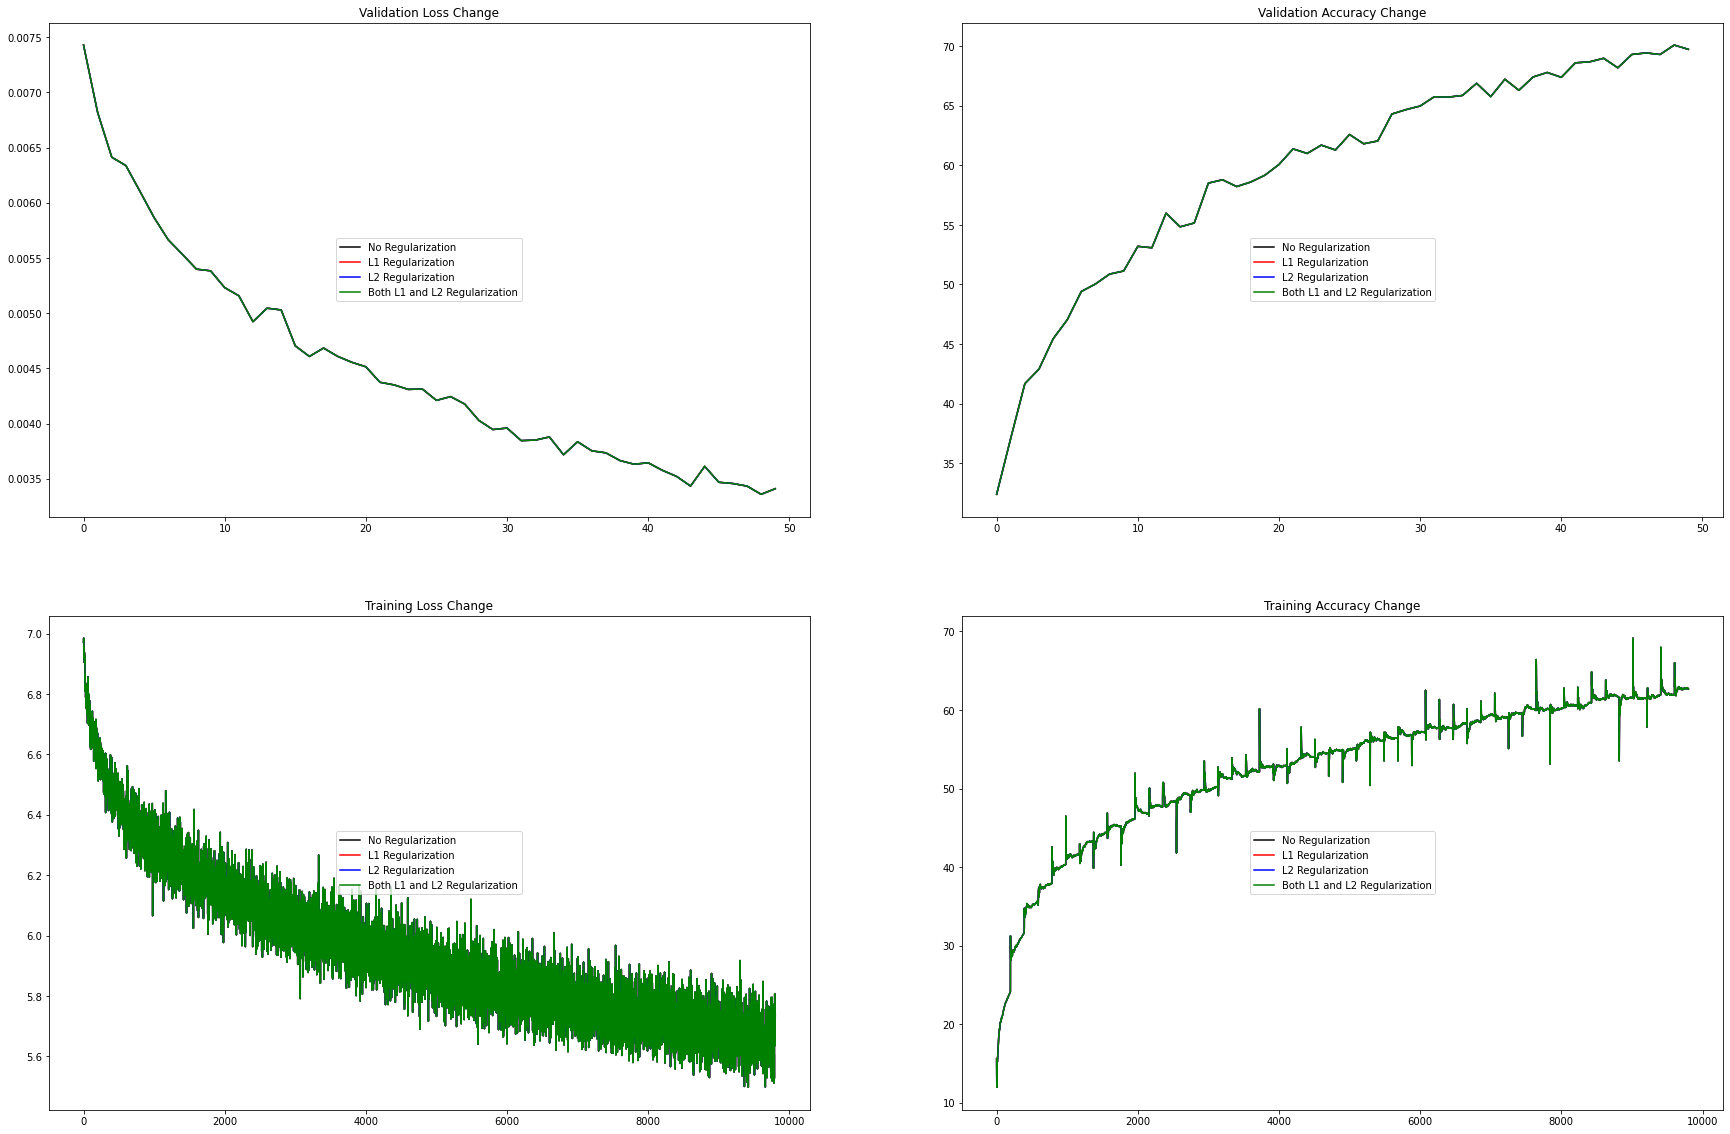

In [9]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)

GRADCAM VISUALIZATION

PRINT MODAL STATE DICT

In [12]:
for param_tensor in cifar_model.m_model.state_dict():
    print(param_tensor, "\t", cifar_model.m_model.state_dict()[param_tensor].size())

Conv0.weight 	 torch.Size([64, 3, 3, 3])
Conv0.bias 	 torch.Size([64])
Conv1.weight 	 torch.Size([64, 64, 3, 3])
Conv1.bias 	 torch.Size([64])
Conv2.weight 	 torch.Size([64, 64, 3, 3])
Conv2.bias 	 torch.Size([64])
Conv3.weight 	 torch.Size([64, 64, 3, 3])
Conv3.bias 	 torch.Size([64])
x2.0.weight 	 torch.Size([64, 3, 3, 3])
x2.0.bias 	 torch.Size([64])
x2.2.weight 	 torch.Size([64])
x2.2.bias 	 torch.Size([64])
x2.2.running_mean 	 torch.Size([64])
x2.2.running_var 	 torch.Size([64])
x2.2.num_batches_tracked 	 torch.Size([])
x3.0.weight 	 torch.Size([64, 64, 3, 3])
x3.0.bias 	 torch.Size([64])
x3.2.weight 	 torch.Size([64])
x3.2.bias 	 torch.Size([64])
x3.2.running_mean 	 torch.Size([64])
x3.2.running_var 	 torch.Size([64])
x3.2.num_batches_tracked 	 torch.Size([])
x5.0.weight 	 torch.Size([64, 64, 3, 3])
x5.0.bias 	 torch.Size([64])
x5.2.weight 	 torch.Size([64])
x5.2.bias 	 torch.Size([64])
x5.2.running_mean 	 torch.Size([64])
x5.2.running_var 	 torch.Size([64])
x5.2.num_batches_trac

OPTIMIZER STATE DICT

In [13]:
for var_name in cifar_model.m_optimizer.state_dict():
    print(var_name, "\t", cifar_model.m_optimizer.state_dict()[var_name])

state 	 {139744844323936: {'momentum_buffer': tensor([[[[-2.0699e-02,  1.8804e-02,  4.3920e-02],
          [-2.7653e-03,  1.3128e-03,  3.7173e-02],
          [ 1.8644e-02,  2.2229e-02,  4.6473e-02]],

         [[-6.7629e-03,  2.9060e-02,  4.8243e-02],
          [ 6.3464e-03,  8.7692e-03,  3.8973e-02],
          [ 3.7727e-02,  2.5531e-02,  4.5597e-02]],

         [[-7.5062e-04,  4.1287e-02,  6.2595e-02],
          [ 1.5196e-02,  2.1473e-02,  5.2768e-02],
          [ 4.2444e-02,  3.0701e-02,  4.6641e-02]]],


        [[[ 4.1967e-02,  4.1024e-02,  4.4151e-02],
          [ 2.0405e-02,  1.4583e-02,  2.4681e-02],
          [ 5.0403e-03,  1.3301e-03,  1.7794e-02]],

         [[ 2.0868e-02,  2.1147e-02,  2.3364e-02],
          [-4.2277e-03, -8.9737e-03,  1.4849e-03],
          [-1.9078e-02, -2.4214e-02, -1.0084e-02]],

         [[ 2.2858e-02,  2.3278e-02,  2.2950e-02],
          [-5.6083e-04, -9.1775e-03,  9.4006e-04],
          [-1.1970e-02, -2.0055e-02, -6.5905e-03]]],


        [[[-2.6874e-